**Spark Veri Çerçevelerine Başlarken**

Spark DataFrames’i kullanmaya başlamak için öncelikle SparkContext
adı verilen bir şey oluşturmamız gerekiyor. SparkContext, dahili
hizmetleri yapılandırır ve Spark yürütme ortamından komut yürütmeyi
kolaylaştırır.

In [ ]:
# Import PySpark
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

#Create SparkSession
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()
sc=spark.sparkContext
sqlc = SQLContext(sc)


In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
sc=spark.sparkContext
sqlc = SQLContext(sc)
from pyspark.sql import *
na_schema = Row("Name","Age")
row1 = na_schema("Ankit", 23)
row2 = na_schema("Tyler", 26)
row3 = na_schema("Preity", 36)
na_list = [row1, row2, row3]
df_na = spark.createDataFrame(na_list)
type(df_na)
df_na.show()


/usr/local/lib/python3.12/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+------+---+
|  Name|Age|
+------+---+
| Ankit| 23|
| Tyler| 26|
|Preity| 36|
+------+---+



**Mevcut bir RDD’den Veri Çerçevesi Oluşturma**

Bu alıştırmada, Spark’ta mevcut bir RDD nesnesinden küçük bir
örnek DataFrame oluşturacağız:



In [ ]:

data = [("Ankit",23),("Tyler",26),("Preity",36)]
data_rdd = sc.parallelize(data)
type(data_rdd)
data_sd = sqlc.createDataFrame(data_rdd)
data_sd.show()


+------+---+
|    _1| _2|
+------+---+
| Ankit| 23|
| Tyler| 26|
|Preity| 36|
+------+---+



**CSV Dosyası Kullanarak Bir Veri Çerçevesi Oluşturma**

Veri kümesi, her bir Iris türü için beş öznitelik içerir: taç yaprağı
uzunluğu, taç yaprağı genişliği, çanak yaprağı uzunluğu, çanak yaprağı
genişliği ve tür. Bu veri kümesini, Spark’a okuyacağımız harici bir
CSV dosyasında sakladık:


In [ ]:
!rm iris.csv

rm: cannot remove 'iris.csv': No such file or directory


In [ ]:
from google.colab import files
uploaded = files.upload()
df = sqlc.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('iris.csv')
type(df)
df.show(4)

Saving iris.csv to iris.csv
+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 4 rows



In [ ]:

import pandas as pd
df.toPandas()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.toPandas().to_csv('iris.csv')
df.printSchema()



root
 |-- _c0: integer (nullable = true)
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [ ]:
df.schema.names

['_c0',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species']

In [ ]:
## Counting the number of rows in DataFrame
##df.count()

## Counting the number of columns in DataFrame
##len(df.columns)

5

In [ ]:
df.show(4)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 4 rows



In [ ]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|     NULL|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|     NULL|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    max|               7.9|                4.4|               6.9|               2.5|virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [ ]:
df.describe('sepal_width').show()

+-------+-------------------+
|summary|        sepal_width|
+-------+-------------------+
|  count|                150|
|   mean| 3.0540000000000007|
| stddev|0.43359431136217375|
|    min|                2.0|
|    max|                4.4|
+-------+-------------------+



In [ ]:
df = df.withColumnRenamed('sepal_width','Sepalwidth')

df.select('Sepalwidth','sepal_length').show(4)

+----------+------------+
|Sepalwidth|sepal_length|
+----------+------------+
|       3.5|         5.1|
|       3.0|         4.9|
|       3.2|         4.7|
|       3.1|         4.6|
+----------+------------+
only showing top 4 rows



In [ ]:
df = df.withColumn('Half_sepal_width', df['Sepalwidth']/2.0)


In [ ]:
df.select('Species').distinct().show()

+-------+
|Species|
+-------+
|    8.0|
|   67.0|
|   70.0|
|    0.0|
|   69.0|
|    7.0|
|  112.0|
|  108.0|
|   88.0|
|   49.0|
|  101.0|
|   98.0|
|  116.0|
|   29.0|
|  107.0|
|   64.0|
|   75.0|
|   47.0|
|   42.0|
|   44.0|
+-------+
only showing top 20 rows



In [ ]:
df.show(4)

+------------+----------+------------+-----------+-------+----------------+
|sepal_length|Sepalwidth|petal_length|petal_width|species|Half_sepal_width|
+------------+----------+------------+-----------+-------+----------------+
|         5.1|       3.5|         1.4|        0.2| setosa|            1.75|
|         4.9|       3.0|         1.4|        0.2| setosa|             1.5|
|         4.7|       3.2|         1.3|        0.2| setosa|             1.6|
|         4.6|       3.1|         1.5|        0.2| setosa|            1.55|
+------------+----------+------------+-----------+-------+----------------+
only showing top 4 rows



In [ ]:
df = df.drop('Half_sepal_width')
df.show(4)

+------------+----------+------------+-----------+-------+
|sepal_length|Sepalwidth|petal_length|petal_width|species|
+------------+----------+------------+-----------+-------+
|         5.1|       3.5|         1.4|        0.2| setosa|
|         4.9|       3.0|         1.4|        0.2| setosa|
|         4.7|       3.2|         1.3|        0.2| setosa|
|         4.6|       3.1|         1.5|        0.2| setosa|
+------------+----------+------------+-----------+-------+
only showing top 4 rows



In [ ]:
df.select('Species').distinct().show()

+----------+
|   Species|
+----------+
| virginica|
|versicolor|
|    setosa|
+----------+



In [ ]:
df.select('Species').distinct().count()

3

In [ ]:
df.select('Species').dropDuplicates().show()

+----------+
|   Species|
+----------+
| virginica|
|versicolor|
|    setosa|
+----------+



In [ ]:
df.filter(df.species == 'setosa').show(4)

+------------+----------+------------+-----------+-------+
|sepal_length|Sepalwidth|petal_length|petal_width|species|
+------------+----------+------------+-----------+-------+
|         5.1|       3.5|         1.4|        0.2| setosa|
|         4.9|       3.0|         1.4|        0.2| setosa|
|         4.7|       3.2|         1.3|        0.2| setosa|
|         4.6|       3.1|         1.5|        0.2| setosa|
+------------+----------+------------+-----------+-------+
only showing top 4 rows



In [ ]:
df.filter((df.sepal_length > 5) & (df.species == 'setosa')).show(4)

+------------+----------+------------+-----------+-------+
|sepal_length|Sepalwidth|petal_length|petal_width|species|
+------------+----------+------------+-----------+-------+
|         5.1|       3.5|         1.4|        0.2| setosa|
|         5.4|       3.9|         1.7|        0.4| setosa|
|         5.4|       3.7|         1.5|        0.2| setosa|
|         5.8|       4.0|         1.2|        0.2| setosa|
+------------+----------+------------+-----------+-------+
only showing top 4 rows



In [ ]:
df.orderBy(df.sepal_length).show(5)

+------------+----------+------------+-----------+-------+
|sepal_length|Sepalwidth|petal_length|petal_width|species|
+------------+----------+------------+-----------+-------+
|         4.3|       3.0|         1.1|        0.1| setosa|
|         4.4|       3.2|         1.3|        0.2| setosa|
|         4.4|       2.9|         1.4|        0.2| setosa|
|         4.4|       3.0|         1.3|        0.2| setosa|
|         4.5|       2.3|         1.3|        0.3| setosa|
+------------+----------+------------+-----------+-------+
only showing top 5 rows



In [ ]:
df.orderBy(df.sepal_length.desc()).show(5)

+------------+----------+------------+-----------+---------+
|sepal_length|Sepalwidth|petal_length|petal_width|  species|
+------------+----------+------------+-----------+---------+
|         7.9|       3.8|         6.4|        2.0|virginica|
|         7.7|       3.8|         6.7|        2.2|virginica|
|         7.7|       2.8|         6.7|        2.0|virginica|
|         7.7|       2.6|         6.9|        2.3|virginica|
|         7.7|       3.0|         6.1|        2.3|virginica|
+------------+----------+------------+-----------+---------+
only showing top 5 rows



In [ ]:
df.groupby('species').agg({'Sepalwidth' : 'mean'}).show()

+----------+------------------+
|   species|   avg(Sepalwidth)|
+----------+------------------+
| virginica|2.9739999999999998|
|versicolor|2.7700000000000005|
|    setosa|3.4180000000000006|
+----------+------------------+



In [ ]:
df.groupby('species').count().show()

+----------+-----+
|   species|count|
+----------+-----+
| virginica|   50|
|versicolor|   50|
|    setosa|   50|
+----------+-----+



In [ ]:
data = df.groupby('species').count().toPandas()

/tmp/ipython-input-3336517990.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = data['species'], y = data['count'],palette=palette)


Text(0.5, 1.0, 'Number of rows per species')

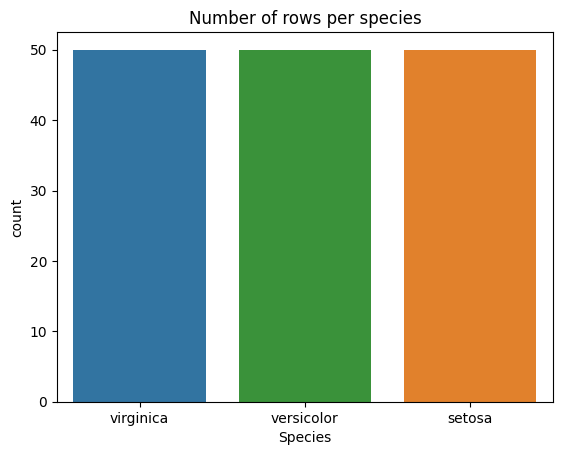

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = {
    'virginica': 'tab:blue',
    'versicolor': 'tab:green',
    'setosa': 'tab:orange',
}
sns.barplot( x = data['species'], y = data['count'],palette=palette)
plt.xlabel('Species')
plt.ylabel('count')
plt.title('Number of rows per species')

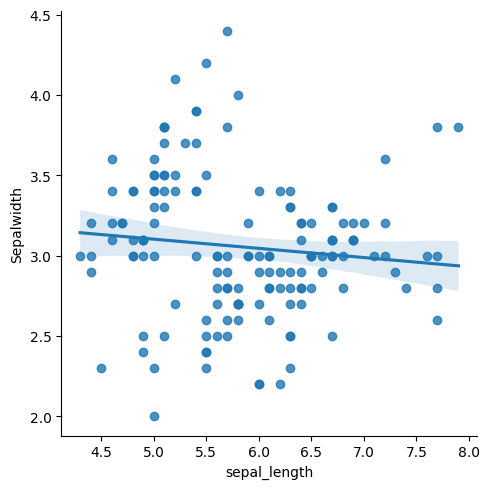

In [ ]:
data = df.toPandas()
sns.lmplot(x = "sepal_length", y = "Sepalwidth", data = data)
plt.show()

/tmp/ipython-input-2889583349.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.Sepalwidth, shade = True)


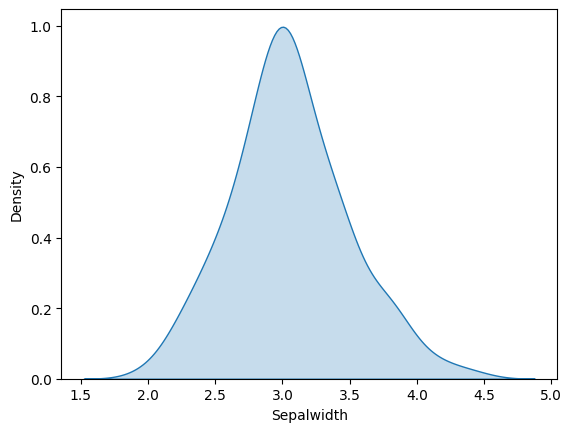

In [ ]:
import seaborn as sns
data = df.toPandas()
sns.kdeplot(data.Sepalwidth, shade = True)
plt.show()

/tmp/ipython-input-1053986334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "species", y = "Sepalwidth", data = data,palette=palette)


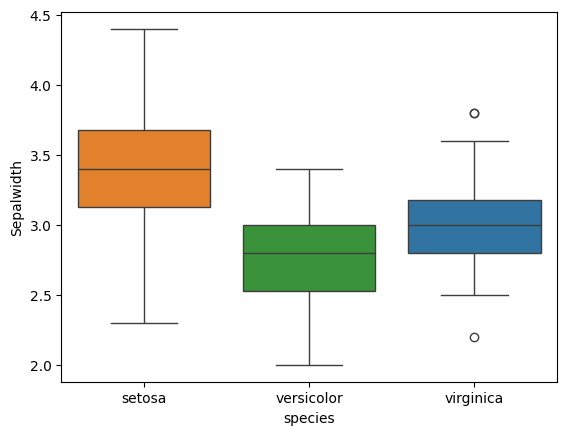

In [ ]:
sns.boxplot(x = "species", y = "Sepalwidth", data = data,palette=palette)
plt.show()

